In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
# Load Datset

df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Support Vector Machines\forestfires.csv")
print(df.shape)
df.head(5)

(517, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["month"] = le.fit_transform(df["month"])
df["day"] = le.fit_transform(df["day"])
df["size_category"] = le.fit_transform(df["size_category"])

<Axes: xlabel='size_category', ylabel='temp'>

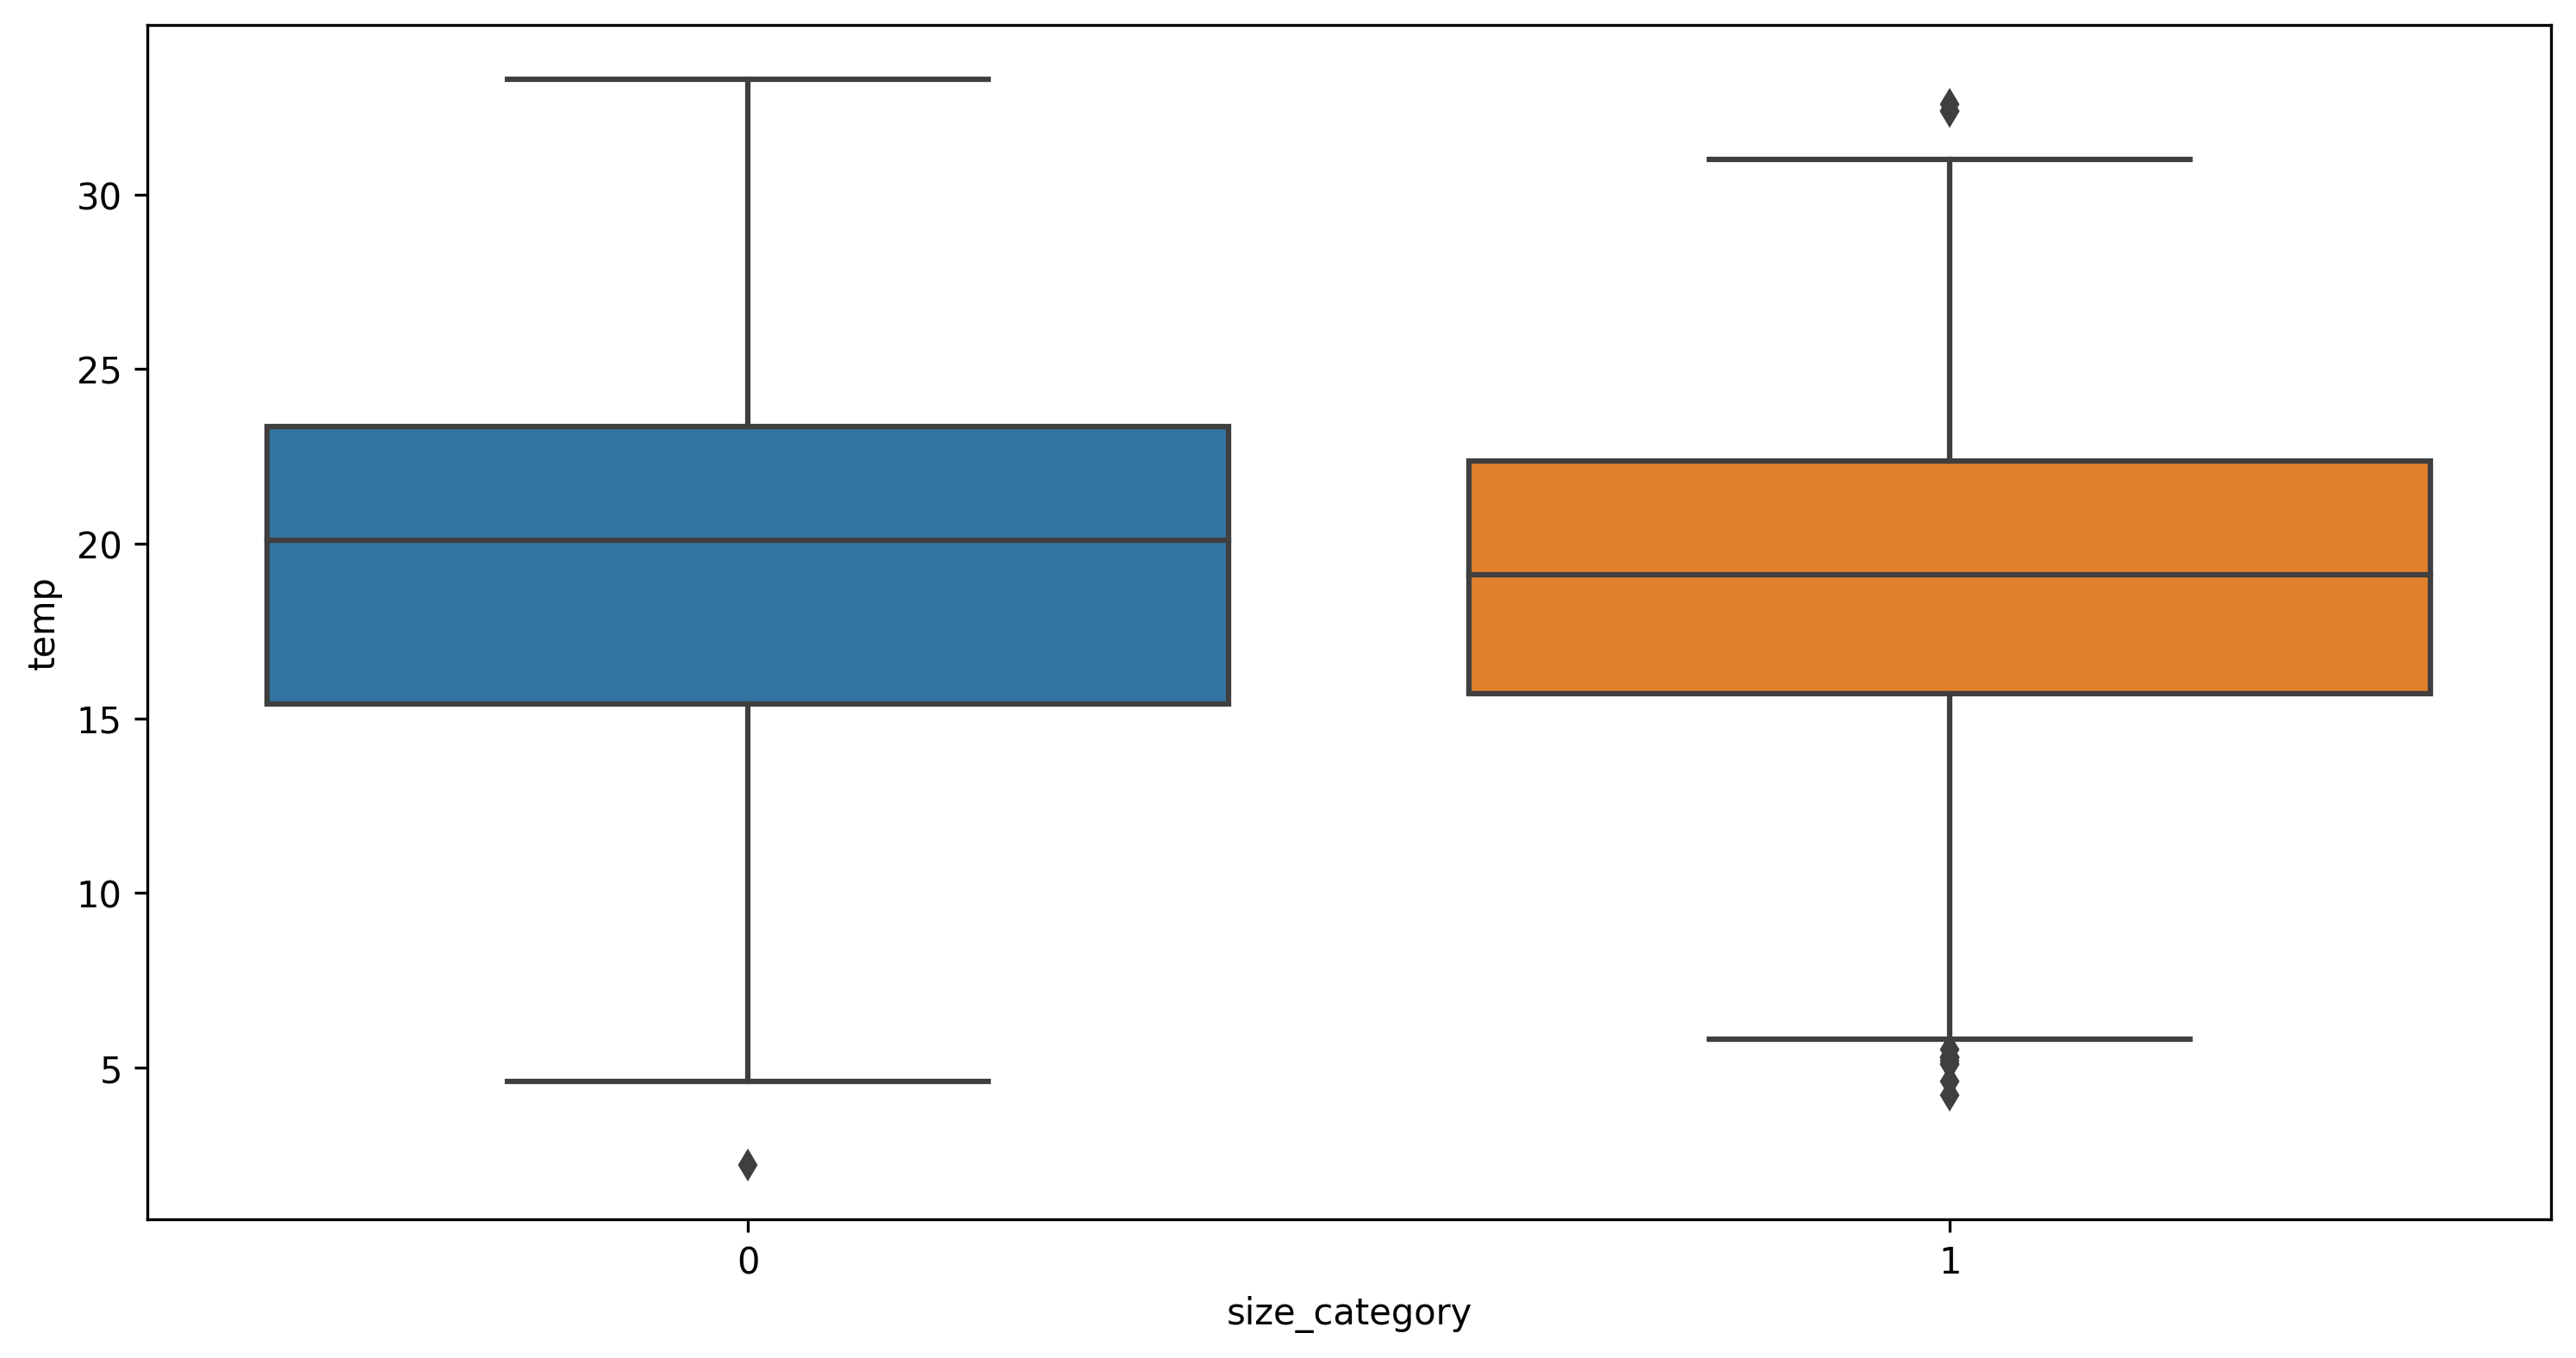

In [7]:
# Boxplot for numerical variables vs. Size_Categorie

plt.figure(figsize=(12, 6))
sns.boxplot(x = "size_category", y = "temp", data=df)

In [8]:
# Defining 'Featues' (X) and 'Target' (Y) variables

x = df.iloc[:,:11]
y = df.iloc[:,-1]

In [9]:
x.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [10]:
y.head(2)

0    1
1    1
Name: size_category, dtype: int32

In [11]:
# Splitting the Data into 'Training' & 'Testing'

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Standardizing the Data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

### Model Bulding 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svmc = SVC()
svmc.fit(xtrain, ytrain)
svmc_pred = svmc.predict(xtest)

print(f"Training Accuracy :", svmc.score(xtrain, ytrain))
print(f"Testing Accuracy :", svmc.score(xtest, ytest))
print(f"Model Accuracy :", classification_report(ytest, svmc_pred))

Training Accuracy : 0.8305084745762712
Testing Accuracy : 0.7788461538461539
Model Accuracy :               precision    recall  f1-score   support

           0       1.00      0.18      0.30        28
           1       0.77      1.00      0.87        76

    accuracy                           0.78       104
   macro avg       0.88      0.59      0.59       104
weighted avg       0.83      0.78      0.72       104



### Hyperparameter Tuning for SVC Model

In [14]:
param_grid = {
    'C' : [0.1, 1, 10, 15, 20],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}

In [15]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=5)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [16]:
gscv.best_params_

{'C': 15, 'gamma': 'scale', 'kernel': 'linear'}

In [17]:
svmc = SVC(C=15, gamma='scale', kernel='linear')
svmc.fit(xtrain, ytrain)
svmc_pred = svmc.predict(xtest)

print(f"Training Accuracy :", svmc.score(xtrain, ytrain))
print(f"Testing Accuracy :", svmc.score(xtest, ytest))
print(f"Model Accuracy :", classification_report(ytest, svmc_pred))

Training Accuracy : 0.9878934624697336
Testing Accuracy : 0.9423076923076923
Model Accuracy :               precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.95      0.97      0.96        76

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.92       104
weighted avg       0.94      0.94      0.94       104

